# Titanic Survived Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('display.max_columns',None) # This will enable us to see truncated columns
df.head()

No. of Rows : 891
No. of Columns : 12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Lets sort columns by their Datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare'], object: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']}

Observation :
This Titanic Dataset contains 891 rows & 12 columns.
Here our objective is to predict survival using classification algorithim for that Here our target variable is 'Survived'.
We have 5 features with object datatypes & rest are with numerical features.

Data Integrity Check

Dataset can contain whitespaces, missing value, duplicates entries, let investigate integrity of data before proceeding for further analysis.

In [6]:
df.duplicated().sum()

0

Checking for presense of whitespaces, '?','null'

In [7]:
df.isin([' ','?','-','null','NA']).sum().any()

False

Missing Value Check

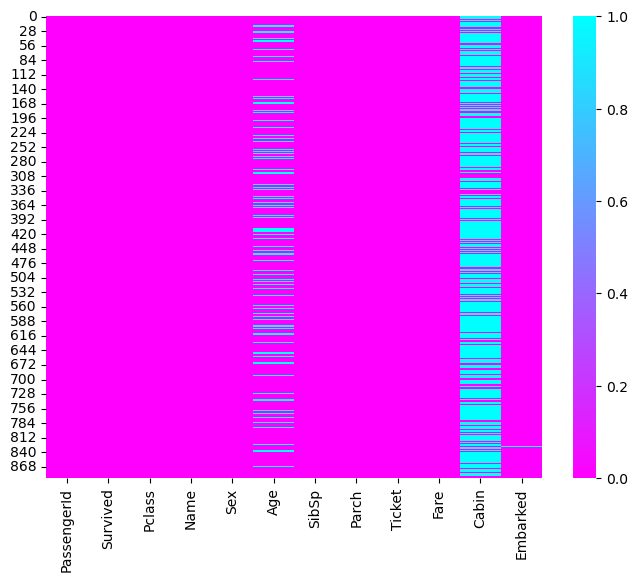

In [8]:
plt.figure(figsize = (8,6))
sns.heatmap(df.isnull(),cmap = 'cool_r')
plt.show()

In [9]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

             Missing Values  % Missing data
Cabin                   687       77.104377
Age                     177       19.865320
Embarked                  2        0.224467
PassengerId               0        0.000000
Survived                  0        0.000000
Pclass                    0        0.000000
Name                      0        0.000000
Sex                       0        0.000000
SibSp                     0        0.000000
Parch                     0        0.000000
Ticket                    0        0.000000
Fare                      0        0.000000


Observation :
Dataset do not contain any duplicate values, whitespaces,"?","-" .
Feature'Age', 'Embarked', and 'Cabin' have null values.
19.86% of 'Age' data is null value,0.22% of 'Embarked' is null value, while 77.10% 'Cabin' data is null value.
Dropping 'Cabin' since 77.10% of its values is missing and therefore it cannot contribute to building a good model for predicting the target variable values.

Statistical Summary

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.describe(include= object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [12]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

"Survived" - Target / Label column has 2 categories / classes.

"sex" - Feature column has 2 categories / classes.

"Pclass" - Feature column has 2 categories / classes.

"Embarked" - Feature column has 3 categories / classes.

"SibSp" - Feature column has 7 discrete values.

"Parch" - Feature column has 7 discrete values.

Cabin is unnecessary feature with missing value so we can drop column Cabin.

In [13]:
df.drop(columns=['Cabin'],inplace = True)

How Many Survived?

In [14]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

TypeError: countplot() got multiple values for argument 'data'

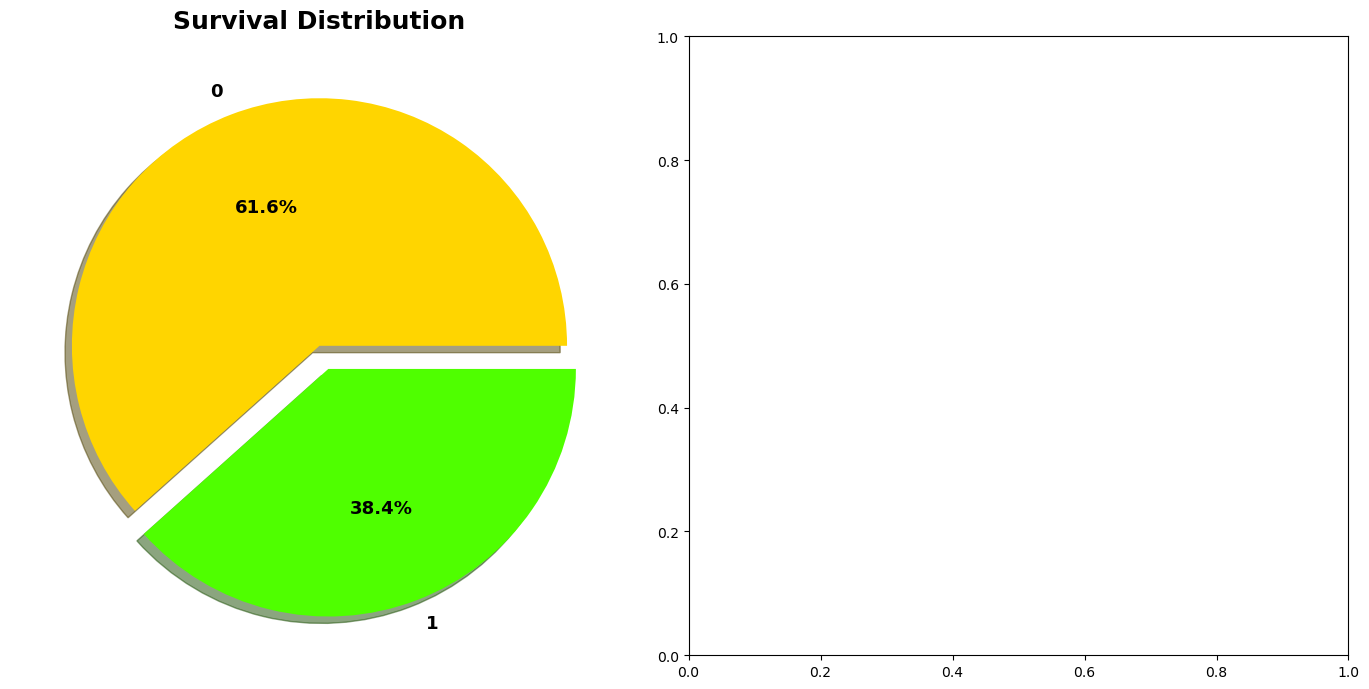

In [15]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('hsv')
f,ax=plt.subplots(1,2,figsize=(14,7))
df['Survived'].value_counts().plot.pie(explode=[0,0.1],textprops ={ 'fontsize':13,'fontweight' :'bold'},autopct='%2.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Survival Distribution',fontsize=18,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df,ax=ax[1])
ax[1].set_title('Survival Count',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Survival Category",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Survival Count", fontsize= 18, fontweight='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

Observation :-
It is evident that not many passengers survived the accident.

Out of 891 passengers in vessel, only around 342 survived i.e only 38.4% of the passenger survived the crash.

Let Investiage Gender-wise Survival Rate of Passengers

In [16]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

TypeError: countplot() got multiple values for argument 'data'

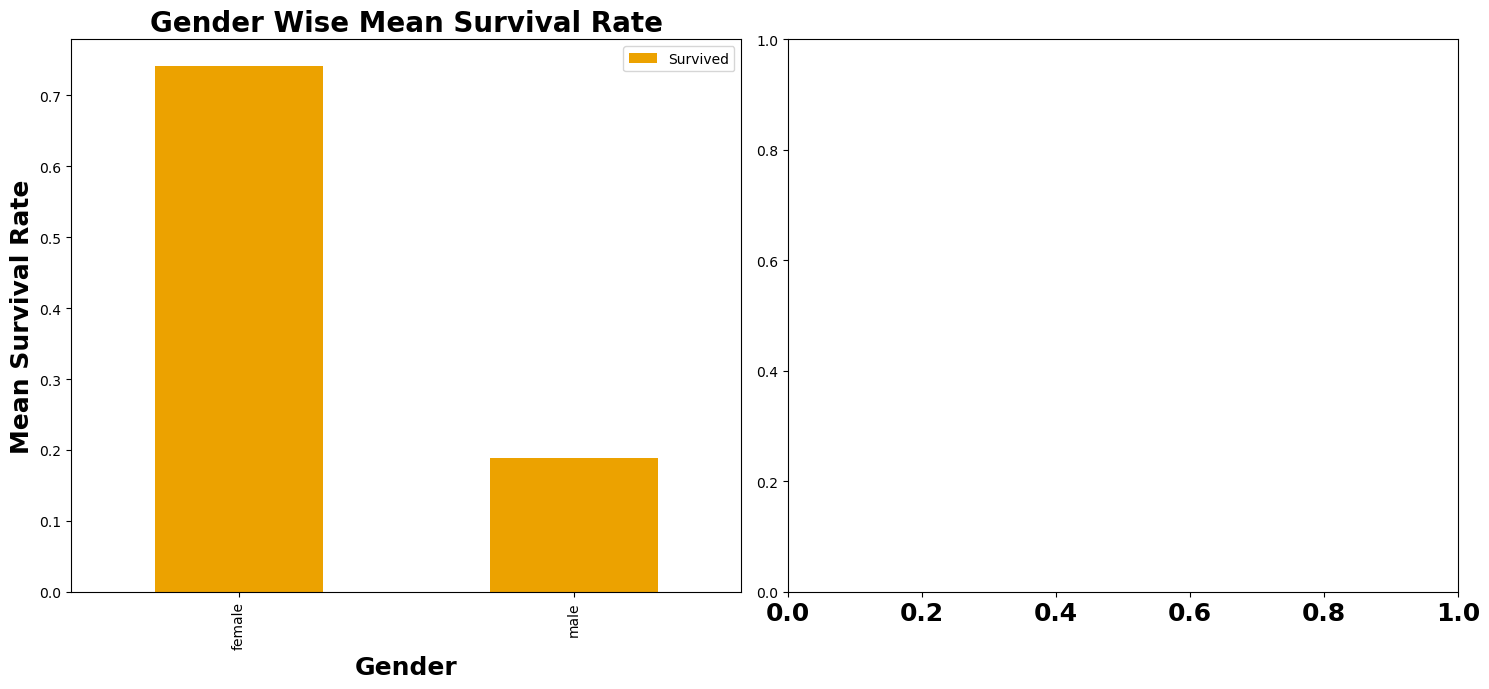

In [17]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot_r')
f,ax=plt.subplots(1,2,figsize=(15,7))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
plt.xticks(fontsize=18,fontweight ='bold',rotation=0)
ax[0].set_title('Gender Wise Mean Survival Rate',fontsize=20,fontweight ='bold')

ax[0].set_xlabel("Gender",fontsize=18,fontweight ='bold')
ax[0].set_ylabel("Mean Survival Rate", fontsize= 18, fontweight='bold')
sns.countplot('Sex', hue='Survived', data=df,ax=ax[1])
ax[1].set_title('Gender-wise Survival Rate of Passengers ',fontsize=20,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Gender",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Survival Count", fontsize= 18, fontweight='bold')
plt.tight_layout()
plt.show()

The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a Woman on ship is around 75% while that for men in around 18-19%.

Exploration of Passengers Class Vs Survival

In [18]:
pd.crosstab(df.Pclass,df.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


TypeError: countplot() got multiple values for argument 'data'

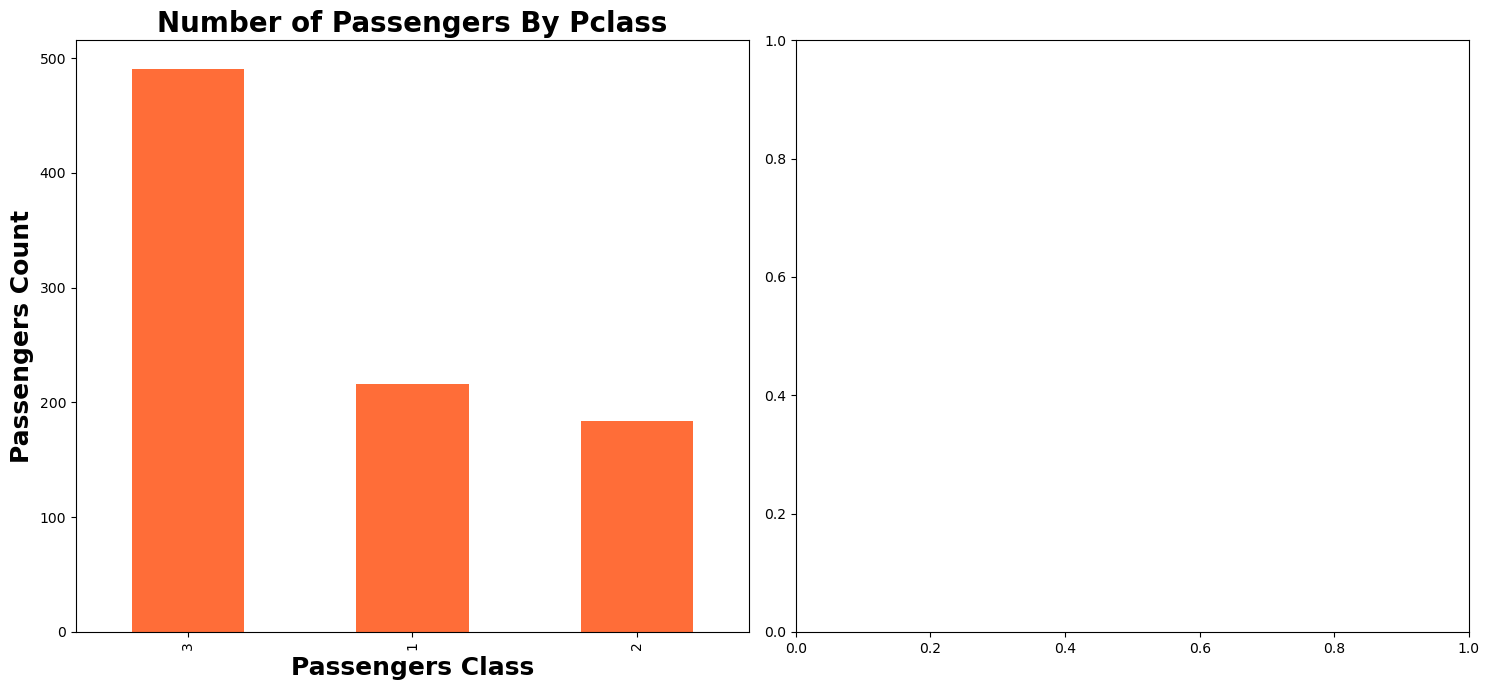

In [19]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
f,ax=plt.subplots(1,2,figsize=(15,7))
df['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', fontsize= 20, fontweight='bold')
ax[0].set_ylabel('Passengers Count',fontsize= 18, fontweight='bold')
ax[0].set_xlabel('Passengers Class', fontsize= 18, fontweight='bold')
sns.countplot('Pclass',hue='Survived', data=df,ax=ax[1])
ax[1].set_title('Pclass:Survived Vs Dead', fontsize= 20, fontweight='bold')
ax[1].set_ylabel('Passengers Count',fontsize= 18, fontweight='bold')
ax[1].set_xlabel('Passengers Class', fontsize= 18, fontweight='bold')
plt.show()

Observation : -
We can clearly, see that Passengers of Pclass 1 were given a very high priority while rescue. Even though the the number of passengers in Pclass 3 were a lot higher, still the number of survival from Pclass 3 is very low, somewhere around 25%.

For Pclass 1 % Survived is around 63% while for pclass2 is around 48%. In Conclusion money and status matters. Such a materialistic world.

Lets Dive in little bit more and check for other interesting observations. Lets check survival rate with Sex and Pclass Together.

In [20]:
pd.crosstab([df.Sex,df.Survived],df.Pclass, margins= True).style.background_gradient(cmap='summer_r')

In [21]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df)
plt.show()

AttributeError: module 'seaborn' has no attribute 'factorplot'

Age

In [22]:
print('Oldest Passenger was of:',df['Age'].max(),'Years')
print('Youngest Passenger was of:',df['Age'].min(),'Years')
print('Average Age on th ship :',df['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on th ship : 29.69911764705882 Years


TypeError: violinplot() got multiple values for argument 'data'

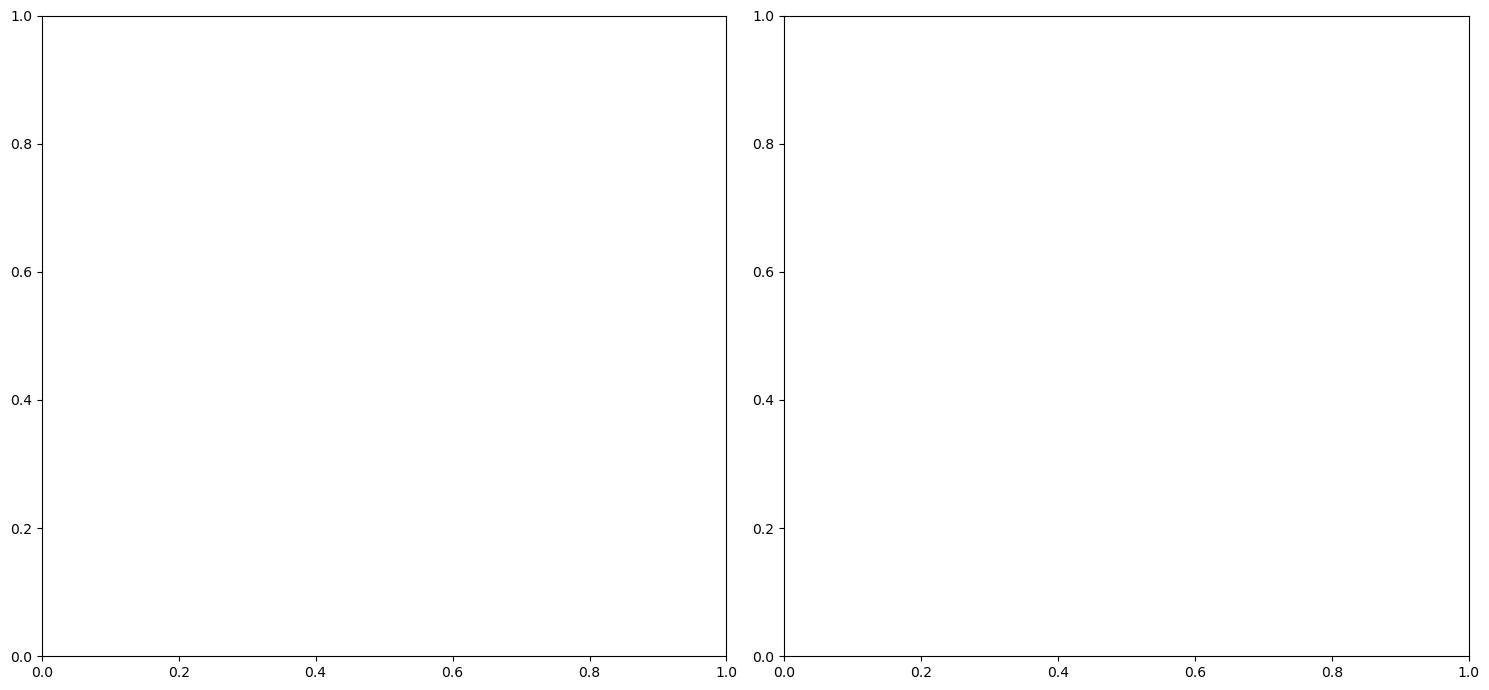

In [24]:
f,ax=plt.subplots(1,2,figsize=(15,7))
sns.violinplot('Pclass','Age',hue='Survived',data=df,split=True,ax=ax[0])
ax[0].set_title('Pclass Wise Distribution of Age Vs Survived',fontsize= 20, fontweight='bold')
ax[0].set_yticks(range(0,110,10))
ax[0].set_ylabel('Passengers Age',fontsize= 18, fontweight='bold')
ax[0].set_xlabel('Passengers Class', fontsize= 18, fontweight='bold')
sns.violinplot('Sex','Age', hue='Survived',data=df, split= True, ax=ax[1])
ax[1].set_title('Gender-Wise Age Vs Survived',fontsize= 20, fontweight='bold')
ax[1].set_yticks(range(0,110,10))
ax[1].set_ylabel('Passengers Age',fontsize= 18, fontweight='bold')
ax[1].set_xlabel('Gender', fontsize= 18, fontweight='bold')
plt.show()

Observation :-
The number of children increases with Pclass and the survival ratee for passenengers below age 10 looks to be good irrespective of the Pclass.
Survival chances for Passenegers aged 20-50 from Pclass 1 is high and even better for women.
For males, the survival chances decreases with increase in age.

Handling Missing Values in feature AGE

As we had seen eariler, the Age feature has 177 null values. to replace thses NaN values, we can assign them the mean age of the dataset.

We cannot simply Assign Mean Age for suppose of 29 year to 4 year old kid. So We must find another way to imputate mean age values.

Looking Upon the name Name Feature, we can see that the names have as salutation like Mr or Mrs. Thus we can assign the mean values of Mr, Mrs etc. to the respective groups.

In [25]:
df['Initial']=0
for i in df:
    df['Initial']=df.Name.str.extract("([A-Za-z]+)\.") # Extract the Salutations with Regex

In [26]:
pd.crosstab(df.Initial,df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [27]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                      ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [28]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Filling NaN Ages

In [29]:
df.loc[(df.Age.isnull() & (df.Initial)=='Mr'), 'Age'].fillna(32.73,inplace = True)

In [30]:
df.loc[((df.Age.isnull())&(df.Initial)=='Mr'), 'Age']=32.73
df.loc[((df.Age.isnull())&(df.Initial)=='Mrs'), 'Age']=35.98
df.loc[((df.Age.isnull())&(df.Initial)=='Master'), 'Age']=4.57
df.loc[((df.Age.isnull())&(df.Initial)=='Miss'), 'Age']=21.86
df.loc[((df.Age.isnull())&(df.Initial)=='Other'), 'Age']=45.889

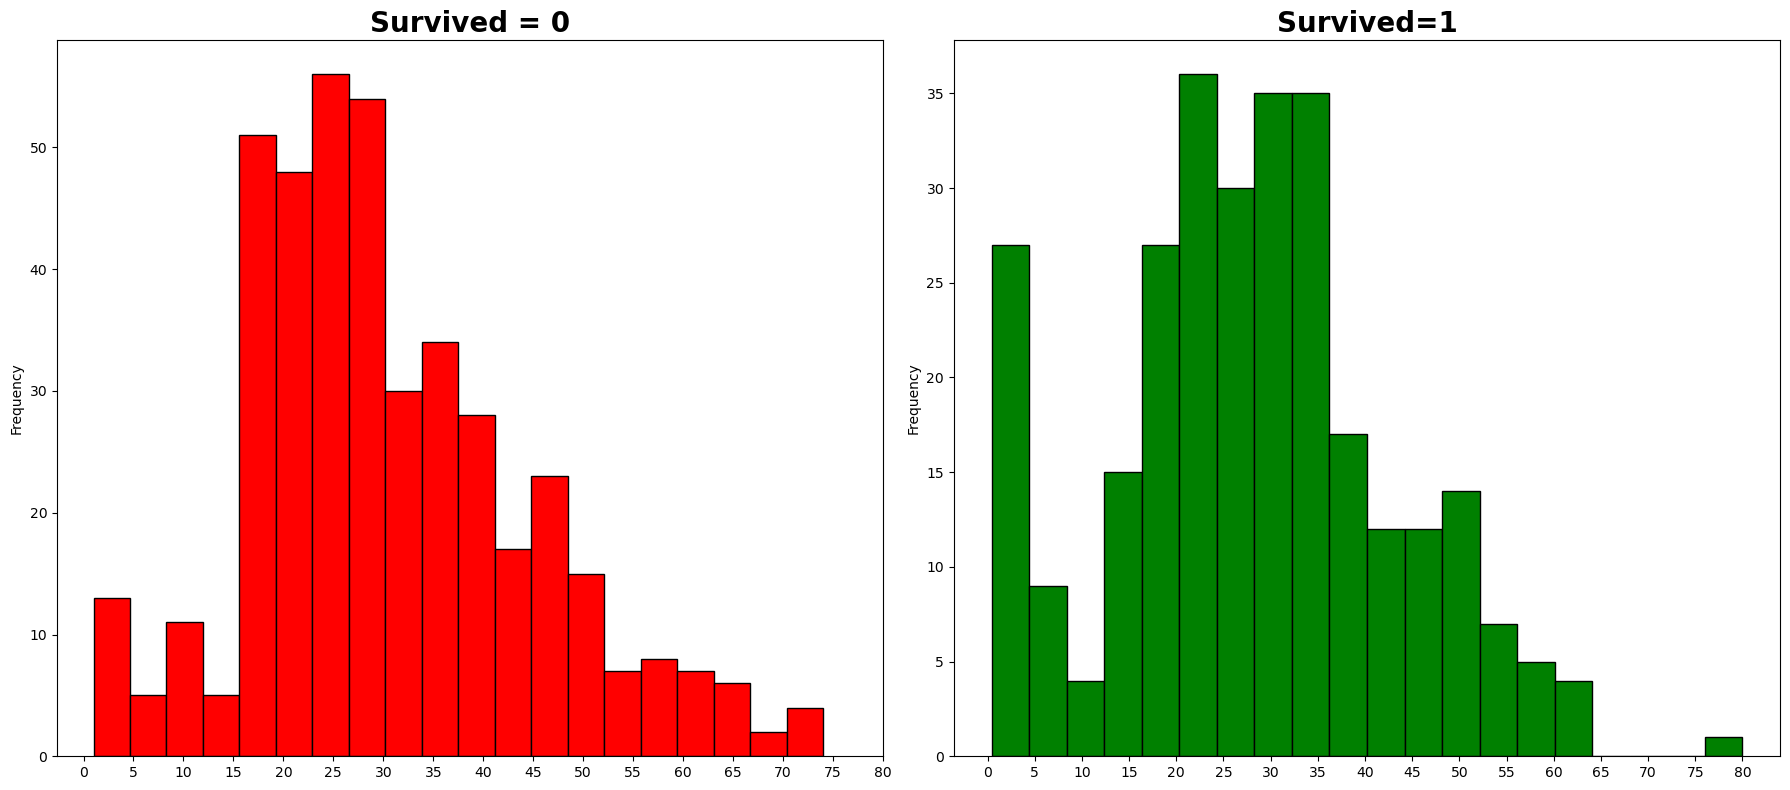

In [31]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0',fontsize= 20, fontweight='bold')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df[df['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
ax[1].set_title('Survived=1',fontsize= 20, fontweight='bold')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

Observation :-
The Toddlers(age<5) were saved in large numbers. Possibliy, Women and Child first policy employs while rescue operation employed.
The oldest Passenger was saved (80 years).
Maximum number of deaths were in age group of 30-40.

In [32]:
sns.factorplot('Pclass','Survived',col='Initial', data=df)
plt.tight_layout()
plt.show()

AttributeError: module 'seaborn' has no attribute 'factorplot'

Analysis Embarked vs Survival

In [33]:
pd.crosstab([df.Embarked,df.Pclass],[df.Sex,df.Survived],margins=True).style.background_gradient(cmap='summer_r')

Chances for Survival by Port of Embarkation

In [34]:
sns.factorplot('Embarked','Survived',data=df)
fig=plt.gcf()
fig.set_size_inches(6,4)
plt.show()

AttributeError: module 'seaborn' has no attribute 'factorplot'

TypeError: countplot() got multiple values for argument 'data'

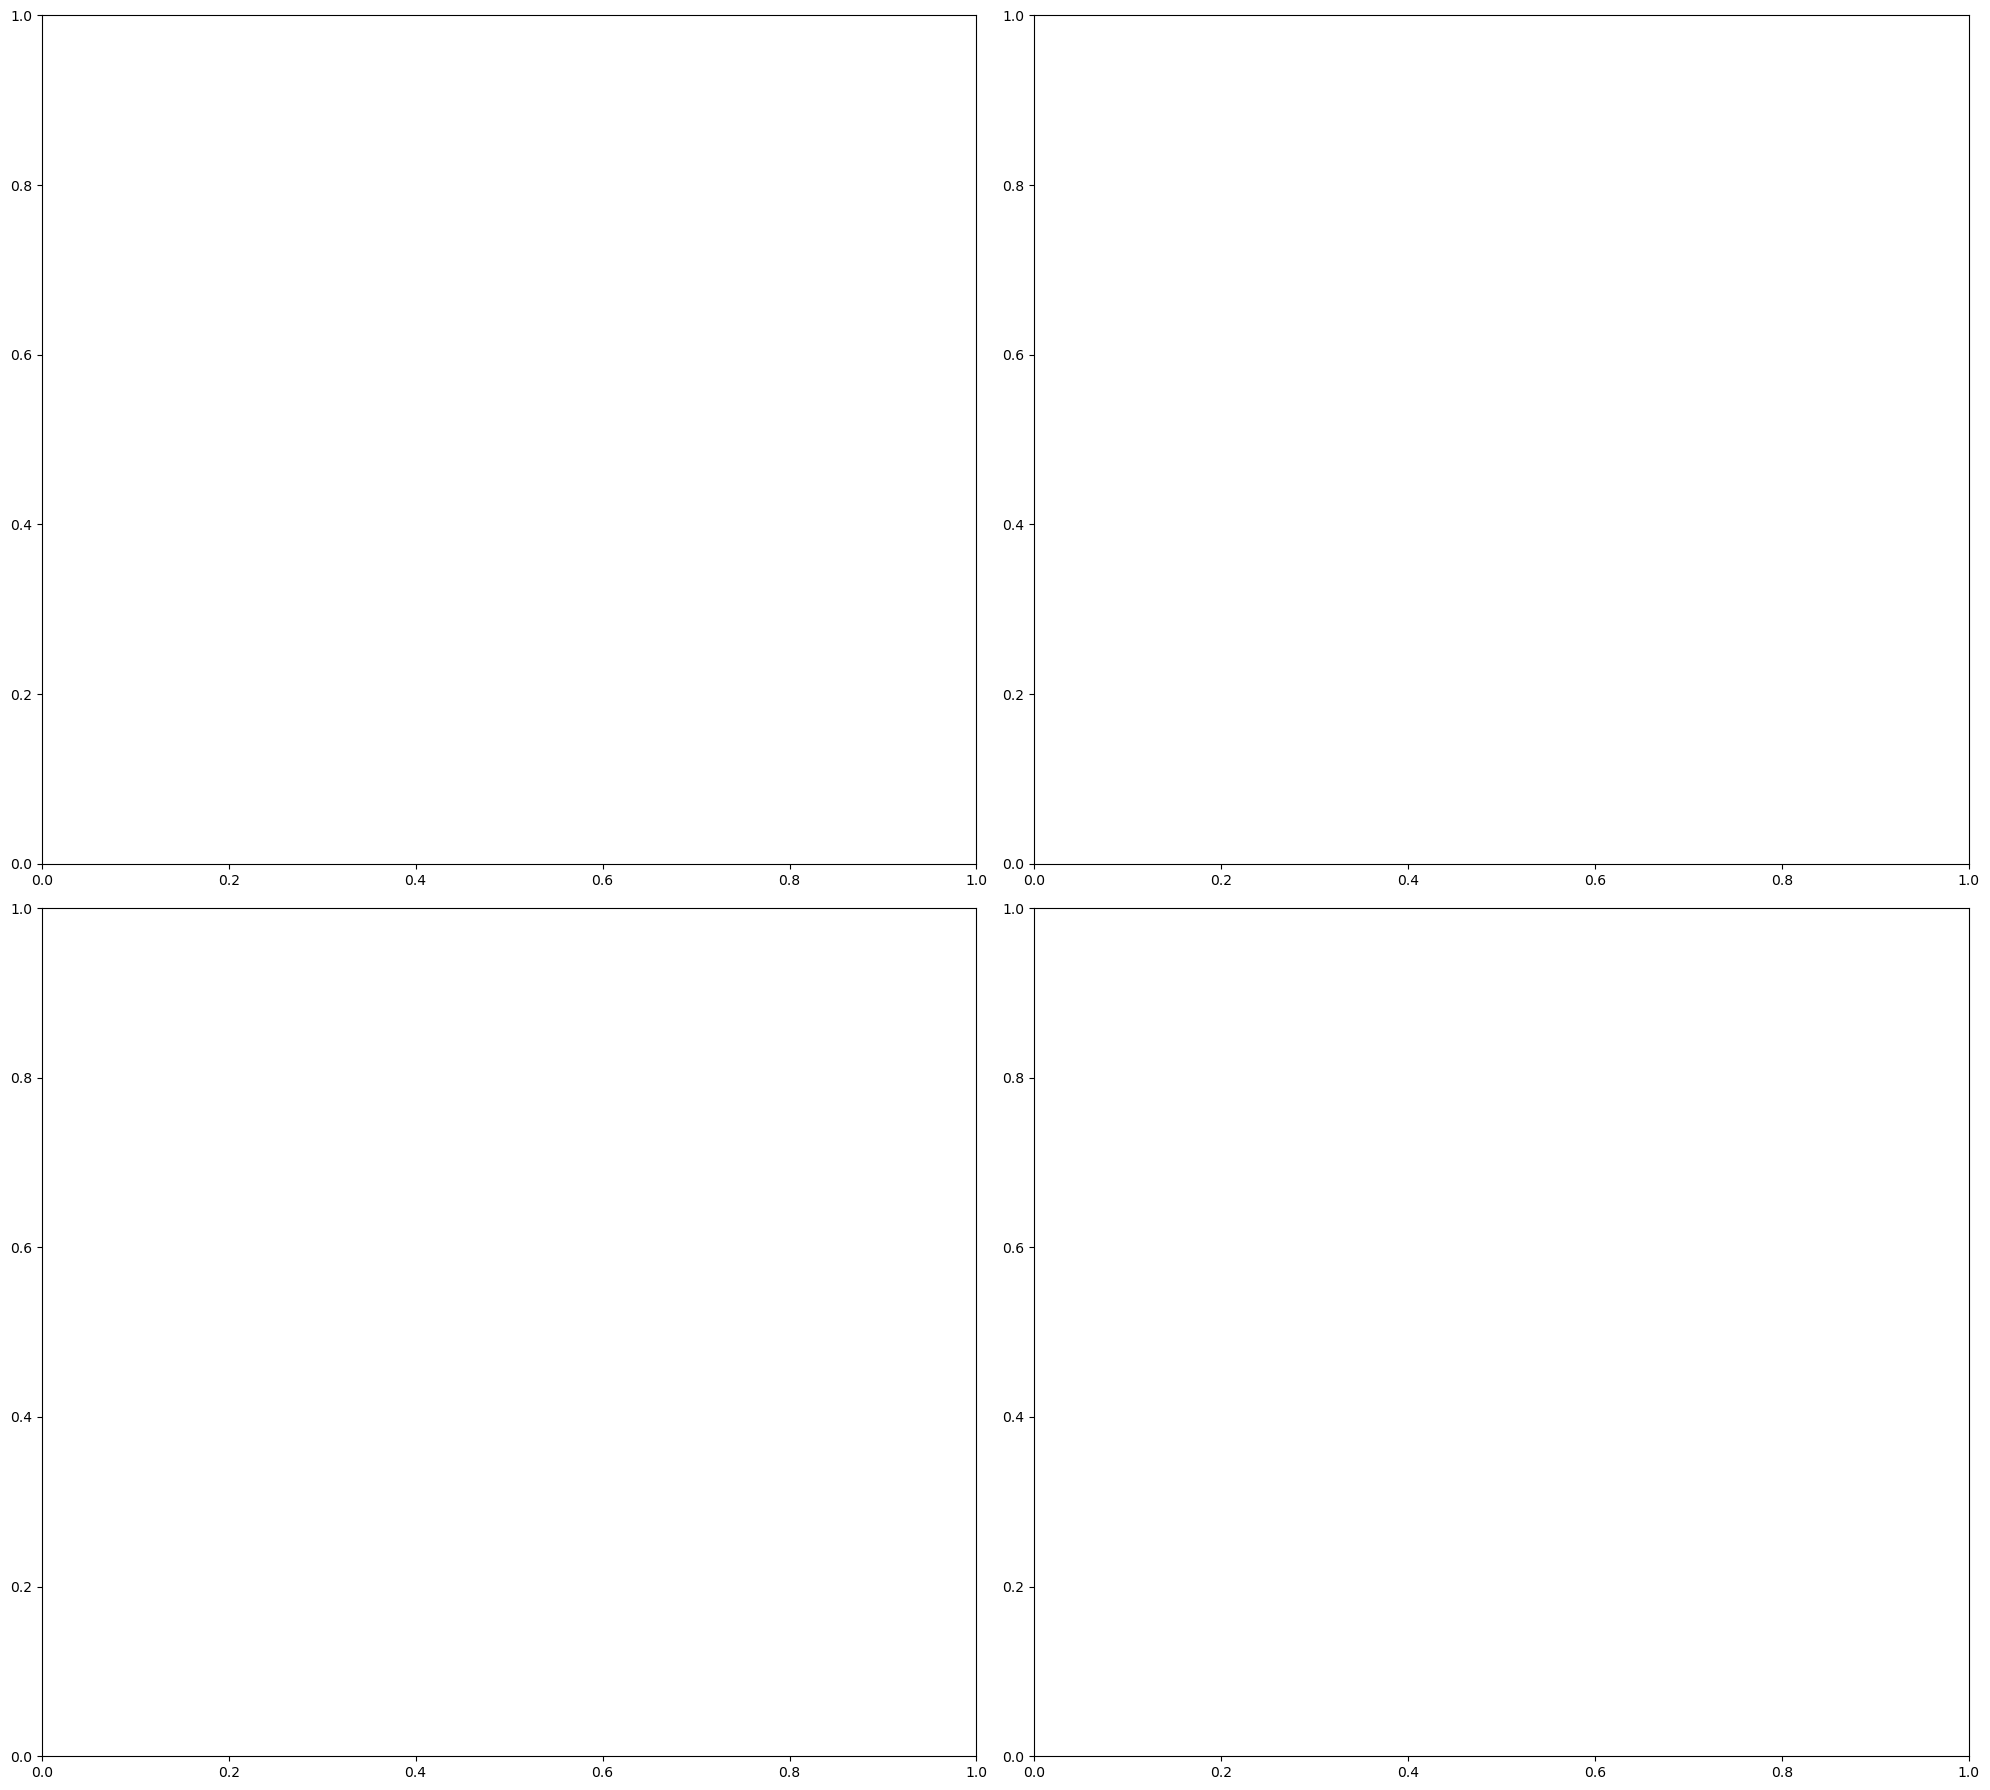

In [35]:
f,ax=plt.subplots(2,2,figsize=(20,18))
sns.countplot('Embarked',data=df,ax=ax[0,0])
ax[0,0].set_title('No of Passengers Boarded',fontsize= 20, fontweight='bold')
ax[0,0].set_ylabel('Passengers Count',fontsize= 18, fontweight='bold')
ax[0,0].set_xlabel('Embarked', fontsize= 18, fontweight='bold')

sns.countplot('Embarked',hue='Sex',data=df,ax=ax[0,1])
ax[0,1].set_title('Male -Female Split for Embarked',fontsize= 20, fontweight='bold')
ax[0,1].set_ylabel('Passengers Count',fontsize= 18, fontweight='bold')
ax[0,1].set_xlabel('Embarked', fontsize= 18, fontweight='bold')

sns.countplot('Embarked',hue="Survived" ,data=df,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived',fontsize= 20, fontweight='bold')
ax[1,0].set_ylabel('Passengers Count',fontsize= 18, fontweight='bold')
ax[1,0].set_xlabel('Embarked', fontsize= 18, fontweight='bold')

sns.countplot('Embarked',hue='Pclass',data=df,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass',fontsize= 20, fontweight='bold')
ax[1,1].set_ylabel('Passengers Count',fontsize= 18, fontweight='bold')
ax[1,1].set_xlabel('Embarked', fontsize= 18, fontweight='bold')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

Observation :-
Maximum passengers boarded from S. Majority of them being from Pclass 3.
The Passengers from C look to be lucky as as good proportion of them survived. The reason for this may be the rescue of all the Pclass 1 and Pclass 2 Passengers.
The Embark S looks to the port from where majority of the rich people. Still the chances for survival is low here, that is because many passengers from Pclass 3 around 81% didn't survive.
Port Q had almost 95% of the passengers were from Pclass 3.

In [36]:
sns.factorplot('Pclass','Survived', hue='Sex', col='Embarked',data=df)
plt.show()

AttributeError: module 'seaborn' has no attribute 'factorplot'

Filling Embarked NaN

As we saw that maximum passengers boarded from Port S, we replace NaN with S.

In [37]:
df['Embarked'].fillna('S', inplace=True)

In [38]:
df.Embarked.isnull().any()

False

SibSip vs Survived

In [39]:
pd.crosstab([df.SibSp],[df.Survived],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


TypeError: barplot() got multiple values for argument 'data'

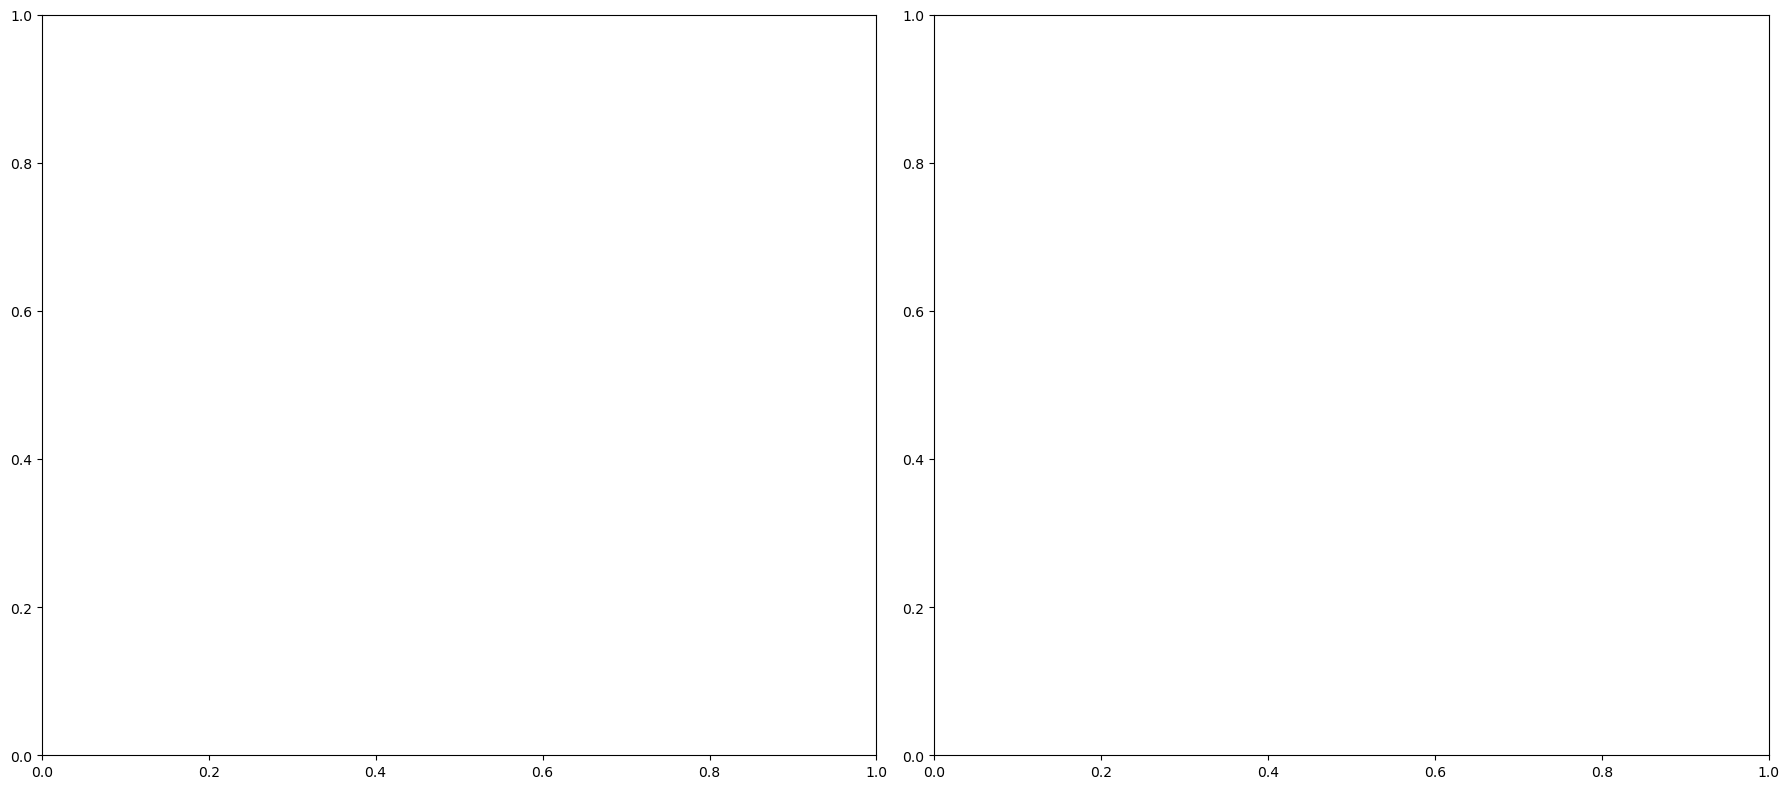

In [40]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.barplot('SibSp','Survived', data=df, ax=ax[0])
ax[0].set_title('SibSp Vs Survived',fontsize= 20, fontweight='bold')

ax[0].set_ylabel('SibSp',fontsize= 18, fontweight='bold')
ax[0].set_xlabel('Survived', fontsize= 18, fontweight='bold')

sns.factorplot('SibSp','Survived',data=df, ax=ax[1])
ax[1].set_title('SibSp Vs Survived',fontsize= 20, fontweight='bold')
ax[1].set_ylabel('SibSp',fontsize= 18, fontweight='bold')
ax[1].set_xlabel('Survived', fontsize= 18, fontweight='bold')
plt.tight_layout()
#plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [41]:
pd.crosstab([df.SibSp],[df.Pclass],margins=True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


Observation :-
The barplot and factor plot show that if as passenger is alone onboard with no siblings, Passenger have 34.5% survival rate. The graph roughly decreases if the number of sibilings increase.

Surprisingly the survival for families with 5-8 members is 0% . The reason may be Pclass ?

The crosstab shows that person with SibSp>3 were all in Pclass. It is imminent that all the large families in Pclass 3 (>3) died.

Parch Vs Survial

In [42]:
pd.crosstab([df.Parch],[df.Pclass],margins=True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
Parch,,,,
0,163,134,381,678
1,31,32,55,118
2,21,16,43,80
3,0,2,3,5
4,1,0,3,4
5,0,0,5,5
6,0,0,1,1
All,216,184,491,891


TypeError: barplot() got multiple values for argument 'data'

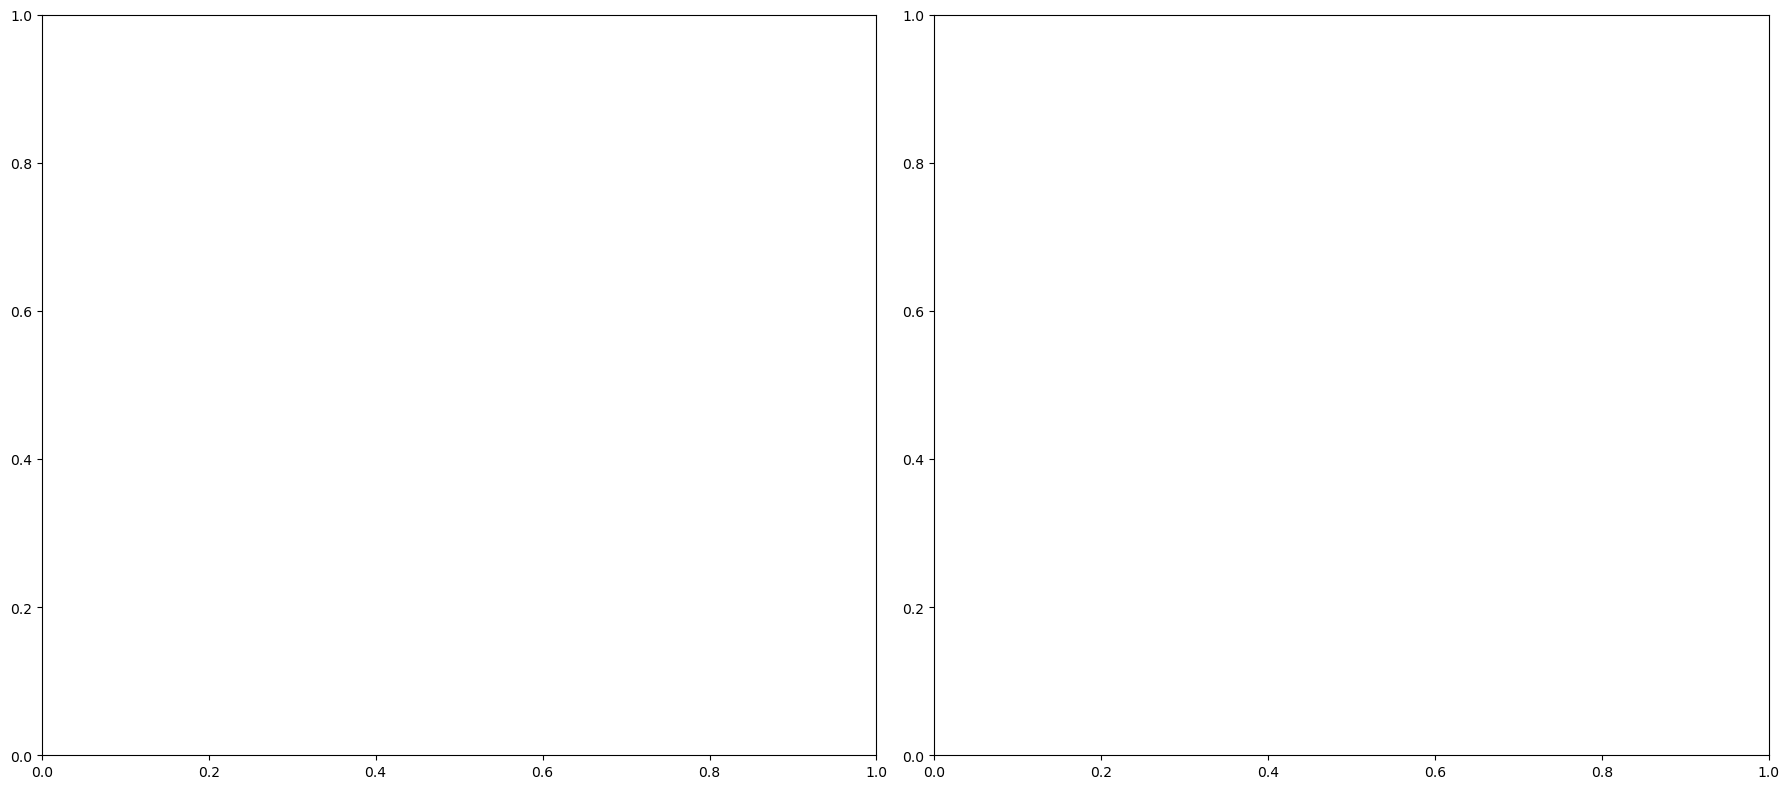

In [43]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.barplot('Parch','Survived', data=df, ax=ax[0])
ax[0].set_title('Parch Vs Survived',fontsize= 20, fontweight='bold')
ax[0].set_ylabel('Survived',fontsize= 18, fontweight='bold')
ax[0].set_xlabel('Parch', fontsize= 18, fontweight='bold')

sns.factorplot('Parch','Survived',data=df, ax=ax[1])
ax[1].set_title('Parch Vs Survived',fontsize= 20, fontweight='bold')
ax[1].set_ylabel('Survived',fontsize= 18, fontweight='bold')
ax[1].set_xlabel('Parch', fontsize= 18, fontweight='bold')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

Fare Vs Survival

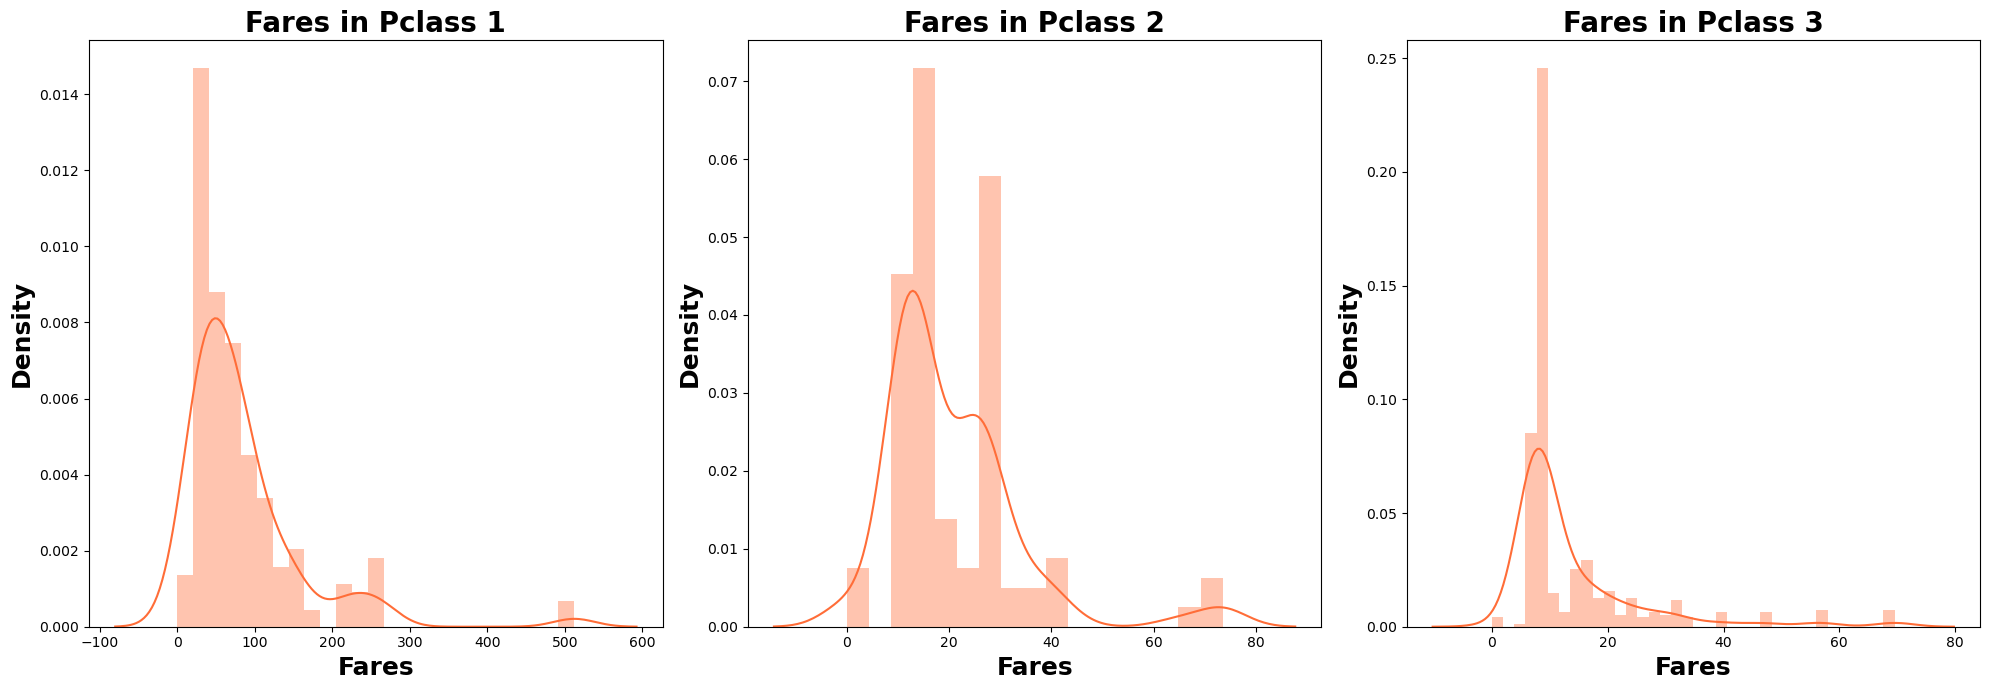

In [44]:
f,ax=plt.subplots(1,3,figsize=(20,7))
sns.distplot(df[df['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1',fontsize= 20, fontweight='bold')
ax[0].set_ylabel('Density',fontsize= 18, fontweight='bold')
ax[0].set_xlabel('Fares', fontsize= 18, fontweight='bold')

sns.distplot(df[df['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2',fontsize= 20, fontweight='bold')
ax[1].set_ylabel('Density',fontsize= 18, fontweight='bold')
ax[1].set_xlabel('Fares', fontsize= 18, fontweight='bold')

sns.distplot(df[df['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3',fontsize= 20, fontweight='bold')
ax[2].set_ylabel('Density',fontsize= 18, fontweight='bold')
ax[2].set_xlabel('Fares', fontsize= 18, fontweight='bold')
plt.show()

There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. As this is also Continous , we can convert into discrete values by using binning

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


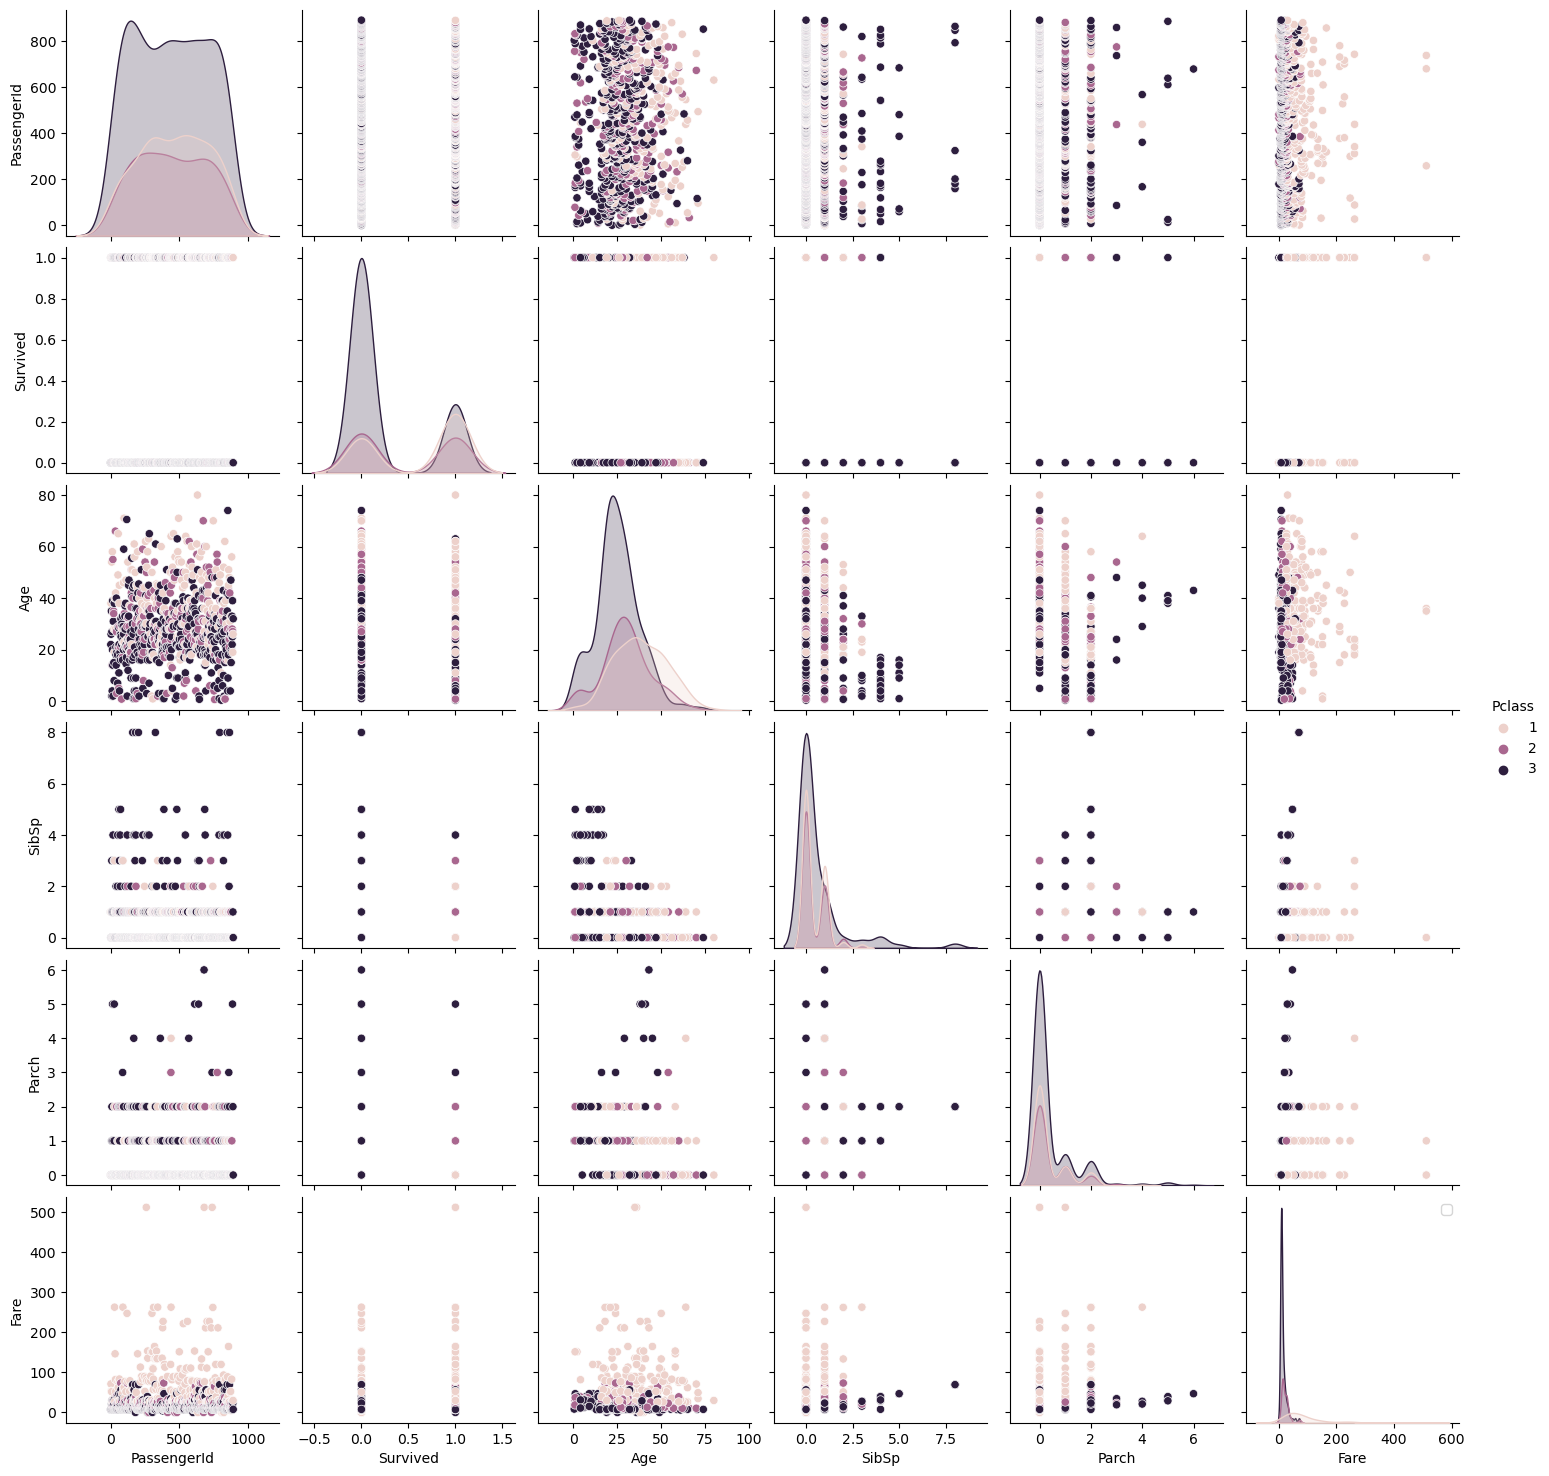

In [45]:
sns.pairplot(data=df, hue='Pclass')
plt.legend()
plt.show()

Correlation

In [46]:
df.corr()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [47]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(), annot= True, cmap='PiYG',linewidths=0.3)
plt.show()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 900x600 with 0 Axes>

Correlation with Target Variables Survived

In [48]:
plt.figure(figsize = (12,5))
df.corr()['Survived'].drop(['Survived']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Survived',fontsize=15)
plt.title('Correlation of Survived with Features',fontsize = 18)
plt.show()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 1200x500 with 0 Axes>

Outliers Detection and Removal

In [49]:
# As we have lot of Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare'], object: ['Name', 'Sex', 'Ticket', 'Embarked', 'Initial']}

In [50]:
# Droping unnecessary column for further investigation
df.drop(["PassengerId", "Name" , "Ticket" ],axis=1,inplace=True)

In [51]:
# As we have lot of Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Survived', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare'], object: ['Sex', 'Embarked', 'Initial']}

In [52]:
Numerical_features= ['Survived', 'Pclass', 'SibSp', 'Parch','Age', 'Fare']
Categorical_features = ['Sex', 'Embarked', 'Initial']

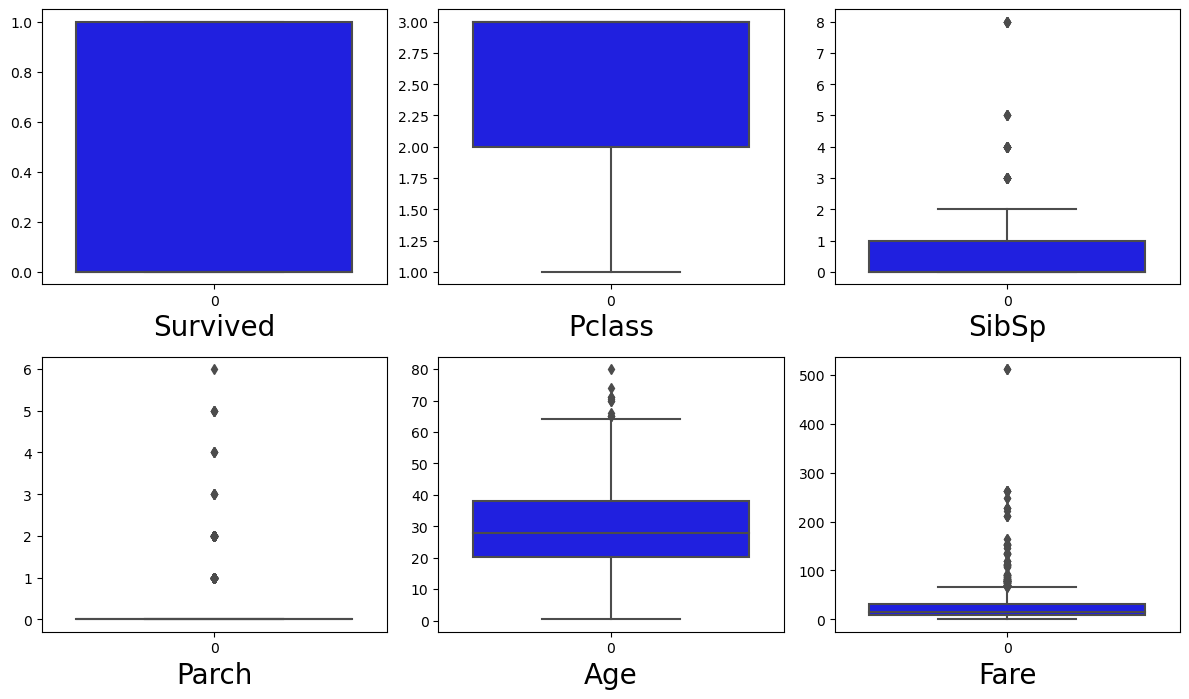

In [53]:
# Identifying the outliers using boxplot in train dataset
plt.figure(figsize=(12,10),facecolor='white')
plotnumber=1
for i in Numerical_features:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i],color='blue')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

We can see that continous features like age & fare contains outliers

In [54]:
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

In [55]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [56]:
# detect outliers from Age, SibSp , Parch and Fare
from collections import Counter
Outliers_to_drop = detect_outliers(df,2,["Age","SibSp","Parch","Fare"])

In [57]:
# Drop outliers
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [58]:
df.shape

(881, 9)

In [59]:
# Filling missing value of Age 

## Fill Age with the median age of similar rows according to Pclass, Parch and SibSp
# Index of NaN age rows
index_NaN_age = list(df["Age"][df["Age"].isnull()].index)

for i in index_NaN_age :
    age_med = df["Age"].median()
    age_pred = df["Age"][((df['SibSp'] == df.iloc[i]["SibSp"]) & (df['Parch'] == df.iloc[i]["Parch"]) & (df['Pclass'] == df.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        df['Age'].iloc[i] = age_pred
    else :
        df['Age'].iloc[i] = age_med

Encoding Categorical Features

In [60]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_features:
    df[i] = le.fit_transform(df[i])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,3
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,2,2


Standard Scaler

In [61]:
# Splitting data in target and dependent feature
X = df.drop(['Survived'], axis =1)
Y = df['Survived']

In [62]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

Machine Learning Model Building

In [63]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=67, test_size=.25)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (660, 8)
Training target vector size: (660,)
Test feature matrix size: (221, 8)
Test target vector size: (221,)


Finding best Random state

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(50,300):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8566037735849057 on Random_state 69


Logistics Regression

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=69, test_size=.25)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8687782805429864


Confusion matrix of Logistics Regression : 
 [[120   9]
 [ 20  72]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       129
           1       0.89      0.78      0.83        92

    accuracy                           0.87       221
   macro avg       0.87      0.86      0.86       221
weighted avg       0.87      0.87      0.87       221



In [67]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.77966102 0.79545455 0.77272727 0.78977273 0.82386364]
Mean CV Score : 0.7922958397534668
Std deviation : 0.017637669142336193


Decision Tree Classifier

In [68]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.8054298642533937


Confusion matrix of Decision Tree Classifier : 
 [[107  22]
 [ 21  71]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       129
           1       0.76      0.77      0.77        92

    accuracy                           0.81       221
   macro avg       0.80      0.80      0.80       221
weighted avg       0.81      0.81      0.81       221



In [69]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(dtc, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', dtc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.75706215 0.78409091 0.81818182 0.74431818 0.82954545]
Mean CV Score : 0.7866397021058038
Std deviation : 0.033191106871090004


Random Forest Classifier

In [70]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier


Accuracy Score of Random Forest Classifier : 0.8506787330316742


Confusion matrix of Random Forest Classifier : 
 [[114  15]
 [ 18  74]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       129
           1       0.83      0.80      0.82        92

    accuracy                           0.85       221
   macro avg       0.85      0.84      0.85       221
weighted avg       0.85      0.85      0.85       221



In [71]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(rfc, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', rfc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.81920904 0.8125     0.86363636 0.76136364 0.82954545]
Mean CV Score : 0.8172508988186955
Std deviation : 0.033022897832538894


AdaBoost Classifier

In [72]:
adbc=AdaBoostClassifier()
adbc.fit(X_train,Y_train)
y_pred=adbc.predict(X_test)
print('\033[1m'+'AdaBoost Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of AdaBoost Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of AdaBoost Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of AdaBoost Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

AdaBoost Classifier Evaluation


Accuracy Score of AdaBoost Classifier : 0.8642533936651584


Confusion matrix of AdaBoost Classifier : 
 [[117  12]
 [ 18  74]]


classification Report of AdaBoost Classifier 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       129
           1       0.86      0.80      0.83        92

    accuracy                           0.86       221
   macro avg       0.86      0.86      0.86       221
weighted avg       0.86      0.86      0.86       221



In [73]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(adbc, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score',adbc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score AdaBoostClassifier() :

CVScore : [0.78531073 0.8125     0.81818182 0.80113636 0.85795455]
Mean CV Score : 0.8150166923472009
Std deviation : 0.024228571770988406


Gradient Boosting Classifier

In [74]:
grad_bc=GradientBoostingClassifier()
grad_bc.fit(X_train,Y_train)
y_pred=grad_bc.predict(X_test)
print('\033[1m'+'Gradient Boosting Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Gradient Boosting Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Gradient Boosting Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Gradient Boosting Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Gradient Boosting Classifier Evaluation


Accuracy Score of Gradient Boosting Classifier : 0.832579185520362


Confusion matrix of Gradient Boosting Classifier : 
 [[117  12]
 [ 25  67]]


classification Report of Gradient Boosting Classifier 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       129
           1       0.85      0.73      0.78        92

    accuracy                           0.83       221
   macro avg       0.84      0.82      0.82       221
weighted avg       0.83      0.83      0.83       221



In [75]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(grad_bc, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score', grad_bc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score GradientBoostingClassifier() :

CVScore : [0.83050847 0.8125     0.85227273 0.79545455 0.85795455]
Mean CV Score : 0.8297380585516179
Std deviation : 0.023567286230155634


Hyper Parameter Tuning : GridSearchCV

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
parameter = [{'fit_intercept': [True, False], #default: True
            'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': [69]
             }]

In [78]:
GCV = GridSearchCV(LogisticRegression(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END fit_intercept=True, penalty=l1, random_state=69, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END fit_intercept=True, penalty=l1, random_state=69, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END fit_intercept=True, penalty=l1, random_state=69, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END fit_intercept=True, penalty=l1, random_state=69, solver=l

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'fit_intercept': [True, False],
                          'penalty': ['l1', 'l2'], 'random_state': [69],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             verbose=5)

In [79]:
GCV.best_params_

{'fit_intercept': True,
 'penalty': 'l2',
 'random_state': 69,
 'solver': 'newton-cg'}

Final Model

In [80]:
Final_mod = LogisticRegression(fit_intercept =True,penalty= "l2",solver='newton-cg',random_state= 69)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Final Random Forest Classifier Model'+'\033[0m')
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'Classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Final Random Forest Classifier Model
Accuracy Score :
 0.8687782805429864


Confusion matrix of Random Forest Classifier : 
 [[120   9]
 [ 20  72]]


Classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       129
           1       0.89      0.78      0.83        92

    accuracy                           0.87       221
   macro avg       0.87      0.86      0.86       221
weighted avg       0.87      0.87      0.87       221



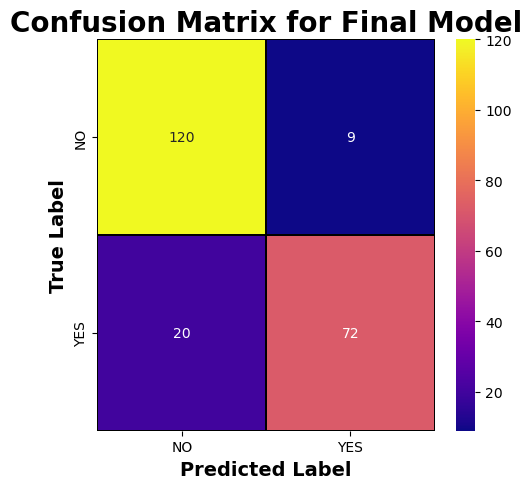

In [81]:
# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

Saving model

In [83]:
import joblib
joblib.dump(Final_mod,'Titanic_Survival_Project.pkl')

['Titanic_Survival_Project.pkl']

Predicting the Final Model

In [84]:
# Prediction
prediction = Final_mod.predict(X_test)

In [85]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0
